# Financial Data Analysis with TensorFlow


In [4]:
import numpy, pandas                 #  Pandas is great for timeseries wrangling
import pandas_datareader.data as web #  Switch this out for yahoo_finance.Share('ticker') 
from datetime import datetime        #  Easier date usage
import h5py                          #  Binary Data Storage
import matplotlib.pyplot as plt      #  For data visualizations
%matplotlib inline               

In [6]:
start, end = datetime(2006,1,1), datetime(2016,1,1)  # Setting the date range
data = pandas.DataFrame(web.DataReader( 'UL', 'yahoo', start, end )) #getting the data
del data['Volume']

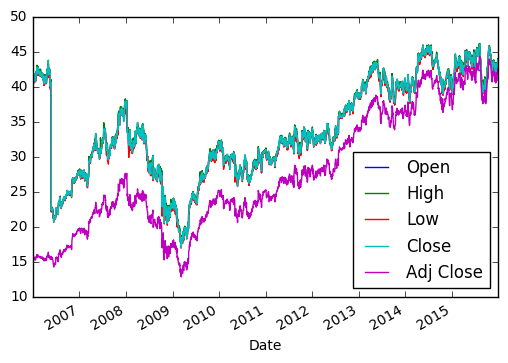

In [7]:
data.plot(); plt.figure(); plt.show()  #  Plotting the historical data

In [8]:
data['Change'] = data.Close.pct_change()*100
data;

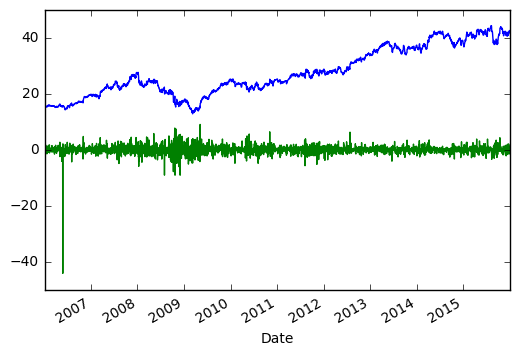

In [9]:
data['Adj Close'].plot(); data['Change'].plot(); plt.show()

In [10]:
data['Change'].mean()

0.018554803452781037

In [11]:
data.cov()

,Open,High,Low,Close,Adj Close,Change
Open,48.698780,48.616818,48.753634,48.650377,50.593782,0.239245
High,48.616818,48.568281,48.683760,48.604748,50.525120,0.310561
Low,48.753634,48.683760,48.846764,48.743175,50.643799,0.330943
Close,48.650377,48.604748,48.743175,48.674386,50.567843,0.420832
Adj Close,50.593782,50.525120,50.643799,50.567843,72.768795,0.386259
Change,0.239245,0.310561,0.330943,0.420832,0.386259,2.939320


In [12]:
data.corr()

,Open,High,Low,Close,Adj Close,Change
Open,1.000000,0.999657,0.999609,0.999256,0.849895,0.019997
High,0.999657,1.000000,0.999516,0.999659,0.849882,0.025992
Low,0.999609,0.999516,1.000000,0.999645,0.849446,0.027619
Close,0.999256,0.999659,0.999645,1.000000,0.849673,0.035183
Adj Close,0.849895,0.849882,0.849446,0.849673,1.000000,0.026416
Change,0.019997,0.025992,0.027619,0.035183,0.026416,1.000000


In [13]:
# First we create a training set

from yahoo_finance import Share
unilever = Share('UL')
UL = pandas.DataFrame(unilever.get_historical('2006-1-1','2016-1-1'))
myarr = numpy.array(UL['Close'].values, dtype=float)

In [3]:
myarr.size

2517

In [14]:
data_20day = list()
for i in range(len(myarr)-20):
    data_20day.append(myarr[i:i+20])
arrdat = numpy.array(data_20day)
h5f = h5py.File('data.h5', 'w')
h5f.create_dataset('dataset_1', data=arrdat)
h5f.close()

In [18]:
# Now we'll create a set to test on
UL2 = pandas.DataFrame(unilever.get_historical('2016-1-1','2016-12-19'))
myarr2 = numpy.array(UL2['Close'].values, dtype=float)
myarr2.size
test_20day = list()
for i in range(len(myarr2)-20):
    test_20day.append(myarr2[i:i+20])
arrdat2 = numpy.array(test_20day)
h5f = h5py.File('testdata.h5', 'w')
h5f.create_dataset('testset_1', data=arrdat2)
h5f.close()